In [1]:
!python --version

Python 3.7.3


# TensorFlow

In [2]:
!pip install tensorflow

  Stored in directory: C:\Users\ashok\AppData\Local\pip\Cache\wheels\2c\b1\94\43d03e130b929aae7ba3f8d15cbd7bc0d1cb5bb38a5c721833
  Stored in directory: C:\Users\ashok\AppData\Local\pip\Cache\wheels\5c\2e\7e\a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
  Stored in directory: C:\Users\ashok\AppData\Local\pip\Cache\wheels\7c\06\54\bc84598ba1daf8f970247f550b175aaaee85f68b4b0c5ab2c6
  Stored in directory: C:\Users\ashok\AppData\Local\pip\Cache\wheels\8e\28\49\fad4e7f0b9a1227708cbbee4487ac8558a7334849cb81c813d
Successfully built opt-einsum gast termcolor absl-py
  Found existing installation: scipy 1.2.1
    Uninstalling scipy-1.2.1:


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\scipy\\cluster\\hierarchy.py'
Consider using the `--user` option or check the permissions.



In [1]:
import tensorflow as tf

# Keras Basics 

In [3]:
datasets="C:\workspace\workplace\datasets"

In [3]:
import os

In [5]:
fakeregfile=os.path.join(datasets,'fake_reg.csv')

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [8]:
fake_reg_df=pd.read_csv(fakeregfile)

In [9]:
fake_reg_df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


### Explore the data

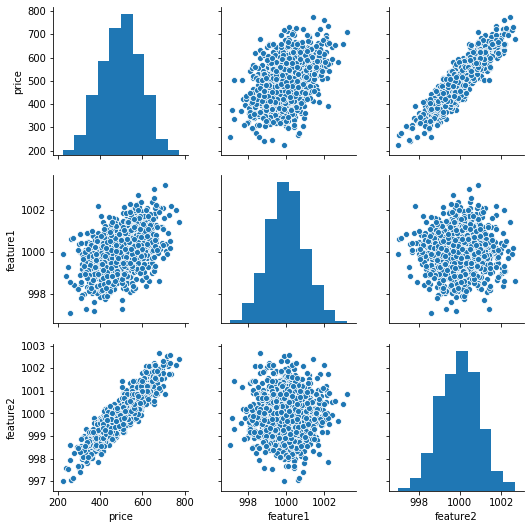

In [10]:
sns.pairplot(fake_reg_df)

In [13]:
#Now Split for test and train and convert pandas to numpy for keras...

X = fake_reg_df.drop(['price'],axis=1).values
y = fake_reg_df['price'].values

In [15]:
print("""
X shape : {0}
Y shape : {1}
""" .format(X.shape,y.shape))


X shape : (1000, 2)
Y shape : (1000,)



In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("""
X_train shape : {0}
Y_train shape : {1}
X_test shape  : {2}
y_test shape  : {3}
""" .format(X_train.shape,y_train.shape,X_test.shape,y_test.shape))


X_train shape : (700, 2)
Y_train shape : (700,)
X_test shape  : (300, 2)
y_test shape  : (300,)



### Normalizing/Scaling the Data

In [21]:
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [23]:
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation

### Model - as a list of layers

In [25]:
model = Sequential([
    Dense(units=2),
    Dense(units=2),
    Dense(units=2)
])

In [28]:
### Otherwise

model = Sequential()
model.add(Dense(units=4,activation='relu'))
model.add(Dense(units=4,activation='relu'))
model.add(Dense(units=4,activation='relu'))

# Final o/p
model.add(Dense(units=1))

In [30]:
model.compile(optimizer='rmsprop',loss='mse')

## Choosing an optimizer and loss

Keep in mind what kind of problem you are trying to solve:

    # For a multi-class classification problem
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # For a mean squared error regression problem
    model.compile(optimizer='rmsprop',
                  loss='mse')

In [31]:
model.fit(X_train,y_train,epochs=250)

Train on 700 samples
Epoch 1/250
700/700 [==============================] - 1s 739us/sample - loss: 256665.7184
Epoch 2/250
700/700 [==============================] - 0s 42us/sample - loss: 256582.8130
Epoch 3/250
700/700 [==============================] - 0s 42us/sample - loss: 256505.2136
Epoch 4/250
700/700 [==============================] - 0s 50us/sample - loss: 256420.7688
Epoch 5/250
700/700 [==============================] - 0s 40us/sample - loss: 256327.3452
Epoch 6/250
700/700 [==============================] - 0s 50us/sample - loss: 256222.5471
Epoch 7/250
700/700 [==============================] - 0s 34us/sample - loss: 256105.1423
Epoch 8/250
700/700 [==============================] - 0s 40us/sample - loss: 255973.4570
Epoch 9/250
700/700 [==============================] - 0s 47us/sample - loss: 255827.9956
Epoch 10/250
700/700 [==============================] - 0s 44us/sample - loss: 255665.8964
Epoch 11/250
700/700 [==============================] - 0s 47us/sample - loss

700/700 [==============================] - 0s 50us/sample - loss: 989.1323
Epoch 181/250
700/700 [==============================] - 0s 41us/sample - loss: 970.9063
Epoch 182/250
700/700 [==============================] - 0s 38us/sample - loss: 951.5625
Epoch 183/250
700/700 [==============================] - 0s 36us/sample - loss: 933.2785
Epoch 184/250
700/700 [==============================] - 0s 37us/sample - loss: 911.1674
Epoch 185/250
700/700 [==============================] - 0s 36us/sample - loss: 893.5951
Epoch 186/250
700/700 [==============================] - 0s 37us/sample - loss: 874.7227
Epoch 187/250
700/700 [==============================] - 0s 38us/sample - loss: 854.6290
Epoch 188/250
700/700 [==============================] - 0s 38us/sample - loss: 833.7845
Epoch 189/250
700/700 [==============================] - 0s 37us/sample - loss: 813.3351
Epoch 190/250
700/700 [==============================] - 0s 38us/sample - loss: 793.4015
Epoch 191/250
700/700 [============

In [32]:
model.history.history

{'loss': [256665.71839285715,
  256582.8130357143,
  256505.21357142858,
  256420.76875,
  256327.34517857144,
  256222.54705357144,
  256105.14232142858,
  255973.45696428572,
  255827.995625,
  255665.89642857143,
  255487.16848214285,
  255290.48553571428,
  255074.62883928572,
  254838.59517857144,
  254579.50598214284,
  254297.745625,
  253991.78482142856,
  253661.35660714286,
  253302.45160714287,
  252914.58794642857,
  252497.50517857142,
  252048.98857142858,
  251566.67446428572,
  251051.96017857143,
  250502.4188392857,
  249912.88517857142,
  249284.90589285715,
  248615.96214285714,
  247905.08607142858,
  247153.3879464286,
  246358.72125,
  245512.50133928572,
  244616.196875,
  243671.33830357142,
  242679.31044642857,
  241630.79375,
  240534.10875,
  239373.95919642856,
  238156.31223214287,
  236877.50214285715,
  235543.78017857144,
  234145.5411607143,
  232677.9380357143,
  231146.82142857142,
  229556.578125,
  227888.32080357143,
  226155.84589285715,
  22434

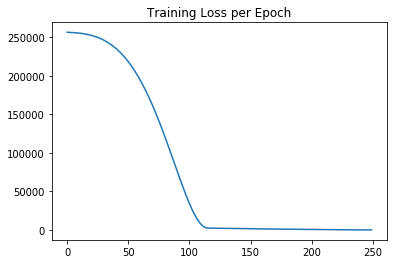

In [35]:
loss = model.history.history['loss']
sns.lineplot(x=range(len(loss)),y=loss)
plt.title("Training Loss per Epoch");

In [36]:
training_score = model.evaluate(X_train,y_train,verbose=0)
test_score = model.evaluate(X_test,y_test,verbose=0)

In [37]:
training_score

69.15811963762556

In [38]:
test_score

67.65503824869792

In [39]:
test_predictions = model.predict(X_test)

In [40]:
test_predictions

array([[414.02417],
       [617.70026],
       [588.47516],
       [569.6181 ],
       [377.55997],
       [576.24646],
       [516.09454],
       [464.39496],
       [548.1784 ],
       [453.6106 ],
       [606.74054],
       [548.45746],
       [426.8839 ],
       [417.27795],
       [643.9419 ],
       [444.0015 ],
       [510.6071 ],
       [651.3431 ],
       [654.0002 ],
       [563.7201 ],
       [347.51556],
       [450.90472],
       [392.6396 ],
       [389.27808],
       [564.53235],
       [605.422  ],
       [532.58276],
       [435.1229 ],
       [647.25366],
       [422.37537],
       [449.0208 ],
       [488.53278],
       [444.96503],
       [671.94617],
       [432.43625],
       [425.43518],
       [504.60803],
       [549.546  ],
       [511.20612],
       [404.40036],
       [613.16473],
       [424.71487],
       [599.9534 ],
       [452.24332],
       [504.25967],
       [579.07605],
       [660.4264 ],
       [493.59952],
       [333.27322],
       [488.7752 ],


In [41]:
pred_df = pd.DataFrame(y_test,columns=['Test Y'])

In [42]:
test_predictions.shape

(300, 1)

In [48]:
test_predictions.reshape(300,)

array([414.02417, 617.70026, 588.47516, 569.6181 , 377.55997, 576.24646,
       516.09454, 464.39496, 548.1784 , 453.6106 , 606.74054, 548.45746,
       426.8839 , 417.27795, 643.9419 , 444.0015 , 510.6071 , 651.3431 ,
       654.0002 , 563.7201 , 347.51556, 450.90472, 392.6396 , 389.27808,
       564.53235, 605.422  , 532.58276, 435.1229 , 647.25366, 422.37537,
       449.0208 , 488.53278, 444.96503, 671.94617, 432.43625, 425.43518,
       504.60803, 549.546  , 511.20612, 404.40036, 613.16473, 424.71487,
       599.9534 , 452.24332, 504.25967, 579.07605, 660.4264 , 493.59952,
       333.27322, 488.7752 , 518.58203, 392.27087, 541.7986 , 417.1218 ,
       634.5779 , 494.01627, 621.52057, 621.2463 , 453.0393 , 487.95618,
       494.0022 , 478.7508 , 673.0583 , 412.03366, 690.14026, 582.9395 ,
       580.02167, 537.89185, 487.99948, 517.69135, 372.94562, 540.4434 ,
       568.2334 , 529.33514, 459.28857, 531.5756 , 509.3577 , 449.33167,
       542.81445, 634.01105, 470.34863, 565.27   , 

In [49]:
test_predictions = pd.Series(test_predictions.reshape(300,))

In [50]:
pred_df = pd.concat([pred_df,test_predictions],axis=1)

In [52]:
pred_df.columns = ['Test Y','Model Predictions']
pred_df

,Test Y,Model Predictions
0,402.296319,414.024170
1,624.156198,617.700256
2,582.455066,588.475159
3,578.588606,569.618103
4,371.224104,377.559967
...,...,...
295,525.704657,529.348999
296,502.909473,516.108032
297,612.727910,604.781982
298,417.569725,425.086060


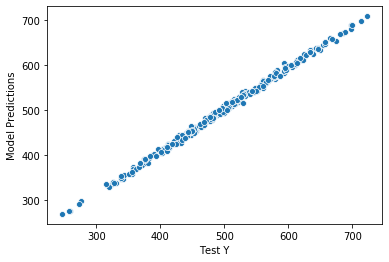

In [53]:
sns.scatterplot(x='Test Y',y='Model Predictions',data=pred_df)

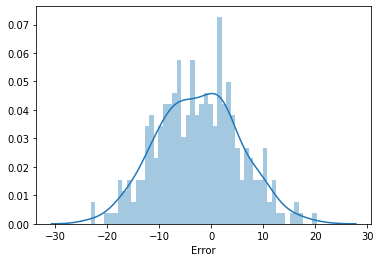

In [54]:
pred_df['Error'] = pred_df['Test Y'] - pred_df['Model Predictions']
sns.distplot(pred_df['Error'],bins=50)

In [55]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [56]:
mean_absolute_error(pred_df['Test Y'],pred_df['Model Predictions'])

6.637294425229343

In [57]:
mean_squared_error(pred_df['Test Y'],pred_df['Model Predictions'])

67.65504332855376

In [62]:
test_score

67.65503824869792

In [59]:
test_score**0.5

8.225268278220348

In [60]:
# [[Feature1, Feature2]]
new_gem = [[998,1000]]
new_gem=scaler.transform(new_gem)
new_gem

array([[0.14117652, 0.53968792]])

In [61]:
model.predict(new_gem)

array([[427.1126]], dtype=float32)

## Saving and Loading a Model

In [63]:
from tensorflow.keras.models import load_model
model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'
later_model = load_model('my_model.h5')
later_model.predict(new_gem)

array([[427.1126]], dtype=float32)

# Keras-Regression

In [4]:
import os,sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

house_data=os.path.join(datasets,'kc_house_data.csv')

In [5]:
house_data_df=pd.read_csv(house_data)

In [6]:
house_data_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
house_data_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [8]:
house_data_df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

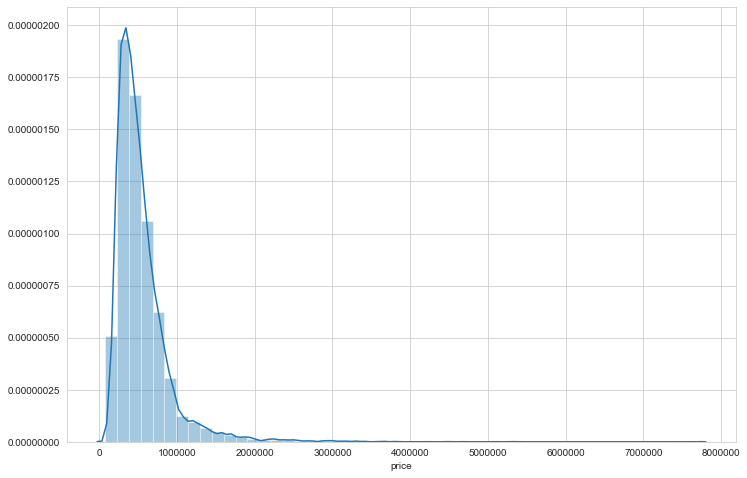

In [11]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
sns.distplot(house_data_df['price'])

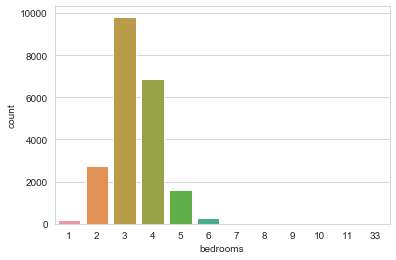

In [12]:
sns.countplot(house_data_df['bedrooms'])

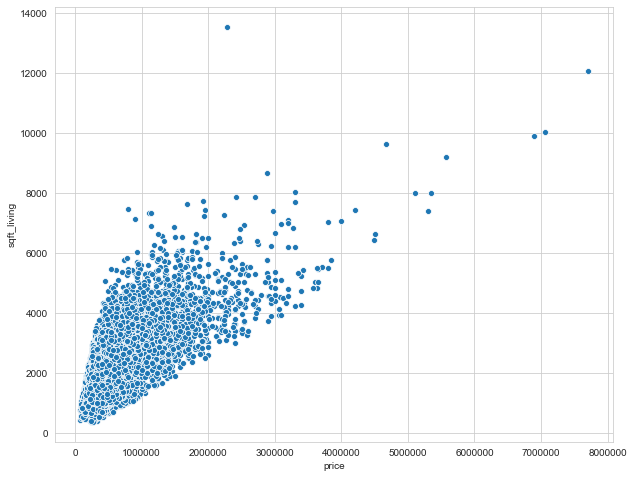

In [13]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='price',y='sqft_living',data=house_data_df)

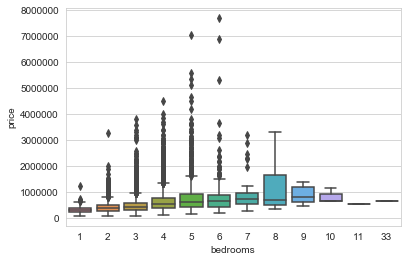

In [14]:
sns.boxplot(x='bedrooms',y='price',data=house_data_df)

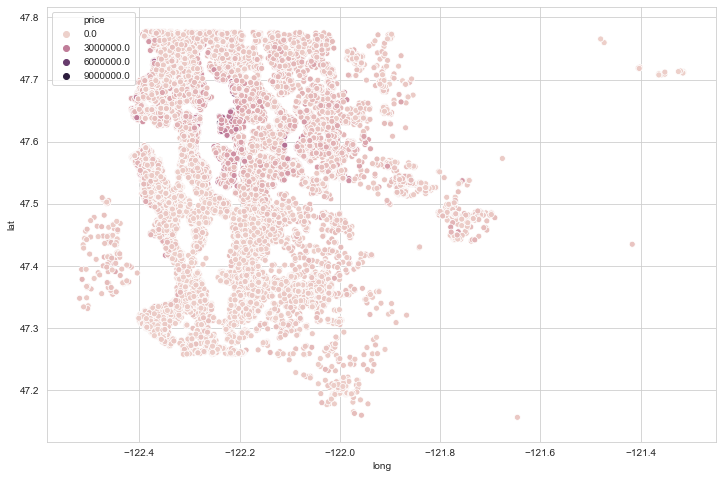

In [16]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=house_data_df,hue='price')

In [18]:
len(house_data_df)*(0.01)

215.97

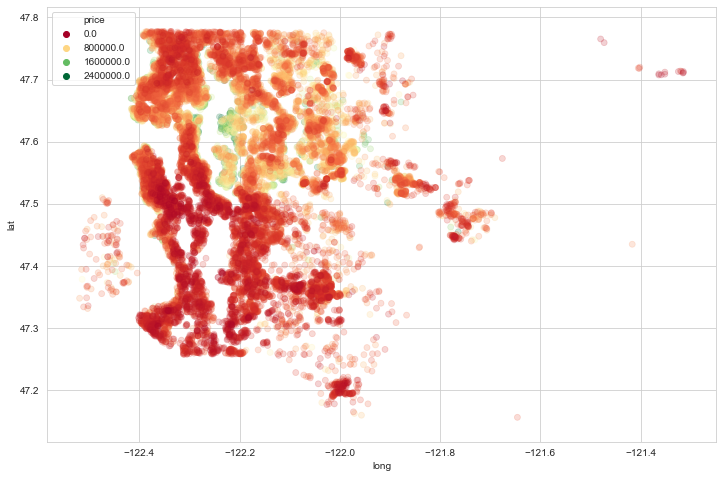

In [20]:
non_top_1_perc = house_data_df.sort_values('price',ascending=False).iloc[216:]
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',
                data=non_top_1_perc,hue='price',
                palette='RdYlGn',edgecolor=None,alpha=0.2)

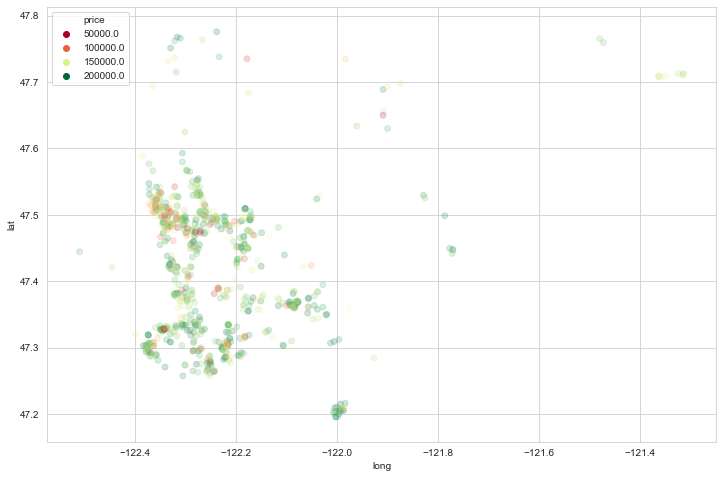

In [23]:
house_lt_200k=house_data_df[(house_data_df['price'] < 200000)].sort_values('price',ascending=False)
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',
                data=house_lt_200k,hue='price',
                palette='RdYlGn',edgecolor=None,alpha=0.2)

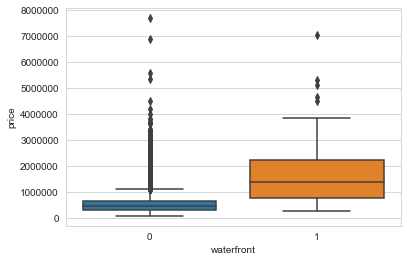

In [24]:
sns.boxplot(x='waterfront',y='price',data=house_data_df)

In [27]:
#house_data_df = house_data_df.drop('id',axis=1)
house_data_df.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [28]:
house_data_df['date'].head(5)

0    10/13/2014
1     12/9/2014
2     2/25/2015
3     12/9/2014
4     2/18/2015
Name: date, dtype: object

In [29]:
pd.to_datetime(house_data_df['date']).head(2)


0   2014-10-13
1   2014-12-09
Name: date, dtype: datetime64[ns]

In [8]:
house_data_df['date'] = pd.to_datetime(house_data_df['date'])

In [9]:
house_data_df['date'][0].month

10

In [34]:
house_data_df['date'][0].year

2014

In [10]:
house_data_df['month'] = house_data_df['date'].apply(lambda date:date.month)
house_data_df['year'] = house_data_df['date'].apply(lambda date:date.year)

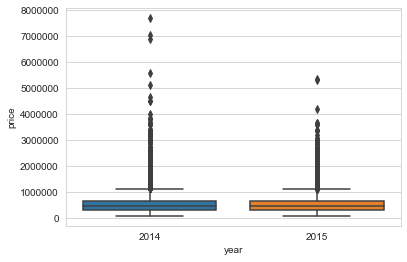

In [38]:
sns.boxplot(x='year',y='price',data=house_data_df)

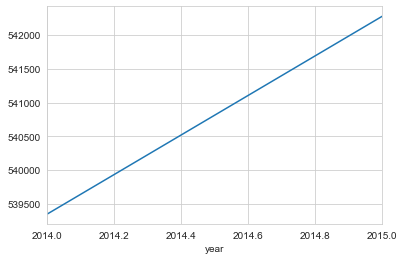

In [42]:
house_data_df.groupby('year').mean()['price'].plot()

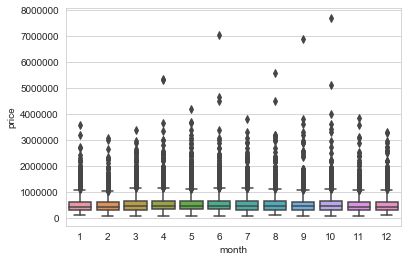

In [39]:
sns.boxplot(x='month',y='price',data=house_data_df)

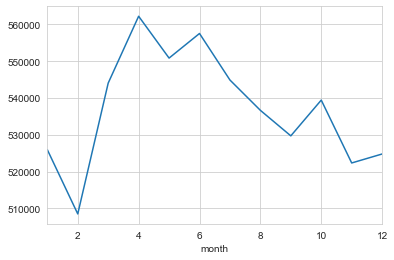

In [40]:
house_data_df.groupby('month').mean()['price'].plot()

In [44]:
house_data_df['sqft_basement'].value_counts()

0       13110
600       221
700       218
500       214
800       206
400       184
1000      149
900       144
300       142
200       108
530       107
480       106
750       105
450       103
720       102
620        91
580        85
840        85
420        81
860        80
1100       80
670        79
780        77
380        76
850        76
550        76
650        76
680        75
240        74
360        73
        ...  
1525        1
2580        1
2500        1
2180        1
1990        1
1284        1
516         1
276         1
20          1
915         1
2850        1
1798        1
2310        1
266         1
2120        1
1913        1
1481        1
3480        1
3000        1
2600        1
2360        1
1960        1
295         1
1880        1
1816        1
792         1
2590        1
935         1
2390        1
248         1
Name: sqft_basement, Length: 306, dtype: int64

In [45]:
house_data_df['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2000       35
2007       35
2005       35
2004       26
1990       25
2006       24
2009       22
1989       22
2002       22
1991       20
2001       19
1998       19
1994       19
1993       19
1987       18
1983       18
1984       18
2010       18
2008       18
1986       17
1985       17
1999       17
1992       17
2015       16
1995       16
1996       15
        ...  
1975        6
1978        6
1981        5
1964        5
1965        5
1958        5
1973        5
1969        4
1972        4
1960        4
1963        4
1956        3
1945        3
1974        3
1953        3
1955        3
1976        3
1957        3
1962        2
1950        2
1967        2
1946        2
1971        2
1940        2
1954        1
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [11]:
### Now we can remove unwanted columns....

house_data_df=house_data_df.drop(['date','zipcode'], axis=1)

In [12]:
house_data_df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,year
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,10,2014
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,12,2014
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2,2015
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,12,2014
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2,2015


In [13]:
house_data_df=house_data_df.drop('id', axis=1)

In [14]:
house_data_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,year
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,10,2014
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,12,2014
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2,2015
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,12,2014
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2,2015


In [15]:
X = house_data_df.drop('price',axis=1)
y = house_data_df['price']

### Scaling 

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

c:\users\ashok\.conda\envs\mytensorflow\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
c:\users\ashok\.conda\envs\mytensorflow\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [18]:
scaler = MinMaxScaler()

In [19]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
X_train.shape

(15117, 19)

In [21]:
X_test.shape

(6480, 19)

## Creating Keras model

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense
from tensorflow.keras.optimizers import Adam

In [23]:
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

### Training the model 

In [24]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=400)

Train on 15117 samples, validate on 6480 samples
Epoch 1/400
15117/15117 [==============================] - 1s 91us/sample - loss: 430242795189.1661 - val_loss: 418927421556.3062
Epoch 2/400
15117/15117 [==============================] - 0s 14us/sample - loss: 429304285004.4935 - val_loss: 415684779890.4099
Epoch 3/400
15117/15117 [==============================] - 0s 13us/sample - loss: 416216548054.1547 - val_loss: 385397265304.3358
Epoch 4/400
15117/15117 [==============================] - 0s 14us/sample - loss: 349594731990.5781 - val_loss: 275020167314.6469
Epoch 5/400
15117/15117 [==============================] - 0s 14us/sample - loss: 205792790830.7903 - val_loss: 128947128456.5333
Epoch 6/400
15117/15117 [==============================] - 0s 14us/sample - loss: 109618580243.7965 - val_loss: 95627034998.2025
Epoch 7/400
15117/15117 [==============================] - 0s 12us/sample - loss: 98012403543.0607 - val_loss: 93875282890.9037
Epoch 8/400
15117/15117 [===================

15117/15117 [==============================] - 0s 15us/sample - loss: 39407429164.1992 - val_loss: 38276394552.8889
Epoch 65/400
15117/15117 [==============================] - 0s 12us/sample - loss: 39182201076.2643 - val_loss: 37862437470.8148
Epoch 66/400
15117/15117 [==============================] - 0s 15us/sample - loss: 38915890287.5650 - val_loss: 37609401361.6988
Epoch 67/400
15117/15117 [==============================] - 0s 13us/sample - loss: 38632871114.6053 - val_loss: 37341258977.0272
Epoch 68/400
15117/15117 [==============================] - 0s 14us/sample - loss: 38375197937.4871 - val_loss: 37102094553.4420
Epoch 69/400
15117/15117 [==============================] - 0s 13us/sample - loss: 38167135772.2130 - val_loss: 36828489247.6049
Epoch 70/400
15117/15117 [==============================] - 0s 14us/sample - loss: 37904217110.8278 - val_loss: 36581732523.9309
Epoch 71/400
15117/15117 [==============================] - 0s 13us/sample - loss: 37682658762.2497 - val_loss

15117/15117 [==============================] - 0s 15us/sample - loss: 33065628148.1797 - val_loss: 31562231742.2617
Epoch 128/400
15117/15117 [==============================] - 0s 14us/sample - loss: 33038553149.7096 - val_loss: 31502319009.1852
Epoch 129/400
15117/15117 [==============================] - 0s 14us/sample - loss: 32992046568.0545 - val_loss: 31450670320.1975
Epoch 130/400
15117/15117 [==============================] - 0s 14us/sample - loss: 32949899036.6702 - val_loss: 31486643571.6741
Epoch 131/400
15117/15117 [==============================] - 0s 14us/sample - loss: 32975281288.6282 - val_loss: 31367941577.6395
Epoch 132/400
15117/15117 [==============================] - 0s 15us/sample - loss: 32897924611.4208 - val_loss: 31338629145.2840
Epoch 133/400
15117/15117 [==============================] - 0s 15us/sample - loss: 32840187931.9082 - val_loss: 31288588520.6123
Epoch 134/400
15117/15117 [==============================] - 0s 14us/sample - loss: 32816615130.8286 - v

15117/15117 [==============================] - 0s 15us/sample - loss: 31536708333.3212 - val_loss: 29774273078.3605
Epoch 191/400
15117/15117 [==============================] - 0s 14us/sample - loss: 31531146853.7768 - val_loss: 29784488219.1802
Epoch 192/400
15117/15117 [==============================] - 0s 15us/sample - loss: 31533688733.5085 - val_loss: 29728816717.1161
Epoch 193/400
15117/15117 [==============================] - 0s 14us/sample - loss: 31496420424.4123 - val_loss: 29700300294.3210
Epoch 194/400
15117/15117 [==============================] - 0s 22us/sample - loss: 31491216050.6598 - val_loss: 29656049208.8889
Epoch 195/400
15117/15117 [==============================] - 1s 33us/sample - loss: 31474067963.6309 - val_loss: 29640115364.3457
Epoch 196/400
15117/15117 [==============================] - 1s 40us/sample - loss: 31486525223.4406 - val_loss: 29650057843.0420
Epoch 197/400
15117/15117 [==============================] - 0s 31us/sample - loss: 31441913481.7458 - v

15117/15117 [==============================] - 0s 14us/sample - loss: 30723342903.6470 - val_loss: 28843408123.5753
Epoch 254/400
15117/15117 [==============================] - 0s 13us/sample - loss: 30770603094.2986 - val_loss: 28851833772.5630
Epoch 255/400
15117/15117 [==============================] - 0s 14us/sample - loss: 30740655728.3779 - val_loss: 28763189875.0420
Epoch 256/400
15117/15117 [==============================] - 0s 15us/sample - loss: 30732397882.0348 - val_loss: 28734835173.4519
Epoch 257/400
15117/15117 [==============================] - 0s 14us/sample - loss: 30709417147.3642 - val_loss: 28751167053.1161
Epoch 258/400
15117/15117 [==============================] - 0s 14us/sample - loss: 30703377173.6932 - val_loss: 28715349520.4346
Epoch 259/400
15117/15117 [==============================] - 0s 14us/sample - loss: 30681312481.8395 - val_loss: 28745495058.9630
Epoch 260/400
15117/15117 [==============================] - 0s 14us/sample - loss: 30672985576.1900 - v

15117/15117 [==============================] - 0s 14us/sample - loss: 30138399353.0822 - val_loss: 27968608043.6148
Epoch 317/400
15117/15117 [==============================] - 0s 14us/sample - loss: 30142647517.0301 - val_loss: 28122512892.2074
Epoch 318/400
15117/15117 [==============================] - 0s 13us/sample - loss: 30100889668.8221 - val_loss: 27964923347.7531
Epoch 319/400
15117/15117 [==============================] - 0s 14us/sample - loss: 30114281891.3001 - val_loss: 28088318088.5333
Epoch 320/400
15117/15117 [==============================] - 0s 14us/sample - loss: 30082692413.2185 - val_loss: 28178825484.0099
Epoch 321/400
15117/15117 [==============================] - 0s 14us/sample - loss: 30112570963.3520 - val_loss: 27920895908.9778
Epoch 322/400
15117/15117 [==============================] - 0s 13us/sample - loss: 30058313320.6218 - val_loss: 27988110186.8247
Epoch 323/400
15117/15117 [==============================] - 0s 14us/sample - loss: 30050915684.1003 - v

15117/15117 [==============================] - 0s 14us/sample - loss: 29424668082.0671 - val_loss: 27200394687.5259
Epoch 380/400
15117/15117 [==============================] - 0s 14us/sample - loss: 29419201201.0341 - val_loss: 27138466919.6642
Epoch 381/400
15117/15117 [==============================] - 0s 14us/sample - loss: 29378845745.3812 - val_loss: 27216810646.4395
Epoch 382/400
15117/15117 [==============================] - 0s 15us/sample - loss: 29369266327.4629 - val_loss: 27442071081.7185
Epoch 383/400
15117/15117 [==============================] - 0s 14us/sample - loss: 29444672653.3021 - val_loss: 27108126598.6370
Epoch 384/400
15117/15117 [==============================] - 0s 14us/sample - loss: 29367235647.3353 - val_loss: 27133237632.3160
Epoch 385/400
15117/15117 [==============================] - 0s 14us/sample - loss: 29519913534.4209 - val_loss: 27095755100.9185
Epoch 386/400
15117/15117 [==============================] - 0s 15us/sample - loss: 29316655936.2328 - v

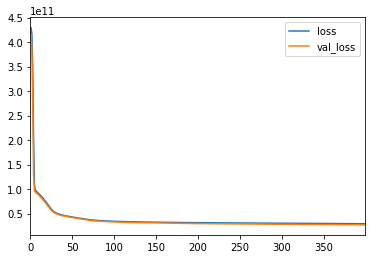

In [26]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [27]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [28]:
predictions = model.predict(X_test)

In [29]:
mean_absolute_error(y_test,predictions)

101274.70960768711

In [30]:
np.sqrt(mean_squared_error(y_test,predictions))

163837.5175782202

In [31]:
explained_variance_score(y_test,predictions)

0.7975936412952428

In [33]:
house_data_df['price'].mean()

540296.5735055795

In [35]:
house_data_df['price'].median()

450000.0

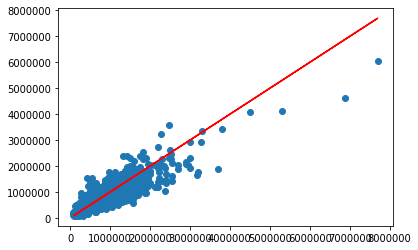

In [36]:
# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

In [37]:
errors = y_test.values.reshape(6480, 1) - predictions

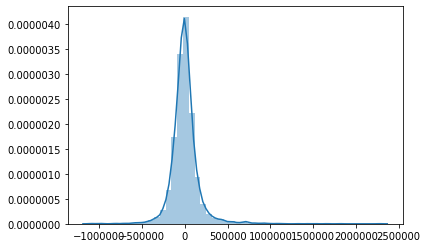

In [38]:
sns.distplot(errors)

### Predicting on a brand new house

In [40]:
single_house = house_data_df.drop('price',axis=1).iloc[0]
single_house = scaler.transform(single_house.values.reshape(-1, 19))
single_house

array([[0.2       , 0.08      , 0.08376422, 0.00310751, 0.        ,
        0.        , 0.        , 0.5       , 0.4       , 0.10785619,
        0.        , 0.47826087, 0.        , 0.57149751, 0.21760797,
        0.16193426, 0.00582059, 0.81818182, 0.        ]])

In [42]:
model.predict(single_house)
house_data_df.iloc[0]

price            221900.0000
bedrooms              3.0000
bathrooms             1.0000
sqft_living        1180.0000
sqft_lot           5650.0000
floors                1.0000
waterfront            0.0000
view                  0.0000
condition             3.0000
grade                 7.0000
sqft_above         1180.0000
sqft_basement         0.0000
yr_built           1955.0000
yr_renovated          0.0000
lat                  47.5112
long               -122.2570
sqft_living15      1340.0000
sqft_lot15         5650.0000
month                10.0000
year               2014.0000
Name: 0, dtype: float64